In [ ]:
!pip install pandas matplotlib

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
file_path = 'data/environment_202405221206.csv'  # Update this path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Display basic information about the dataframe
print("\nDataframe information:")
print(df.info())

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')



# Extract the hour from the timestamp


# df['hour'] = df['timestamp'].dt.hour



C:\Users\david\AppData\Local\Temp\ipykernel_16444\2224531975.py:6: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First few rows of the dataframe:
   id                      timestamp    co2  temperature   humidity motion  \
0   5  2023-07-20 15:03:41.824 +0200  720.0    24.938583  43.673706    NaN   
1   6  2023-07-20 15:04:26.847 +0200  126.0    23.833069  44.918823    NaN   
2   5  2023-07-20 15:04:42.144 +0200  726.0    24.965286  43.572998    NaN   
3   5  2023-07-19 17:15:10.218 +0200  682.0    25.293740  54.635620    NaN   
4   1  2023-07-19 17:16:34.463 +0200    NaN     0.000000        NaN    NaN   

   water_meter controller_input_0 controller_input_1 controller_output_0  \
0          NaN              False              False               False   
1          NaN               True              False               False   
2          NaN              False              False               False   
3          NaN                NaN                NaN                 NaN   
4          NaN                NaN                NaN                 NaN   

  controller_output_1  cellular_signal_qu

C:\Users\david\AppData\Local\Temp\ipykernel_16444\2224531975.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [18]:
for i, ts in enumerate(df['timestamp']):
    try:
        pd.to_datetime(ts)
    except Exception:
        print(f"Error at index {i}: {ts}")

df['timestamp'] = df['timestamp'].interpolate()

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df = df.dropna(subset=['timestamp'])

df['hour'] = df['timestamp'].dt.hour


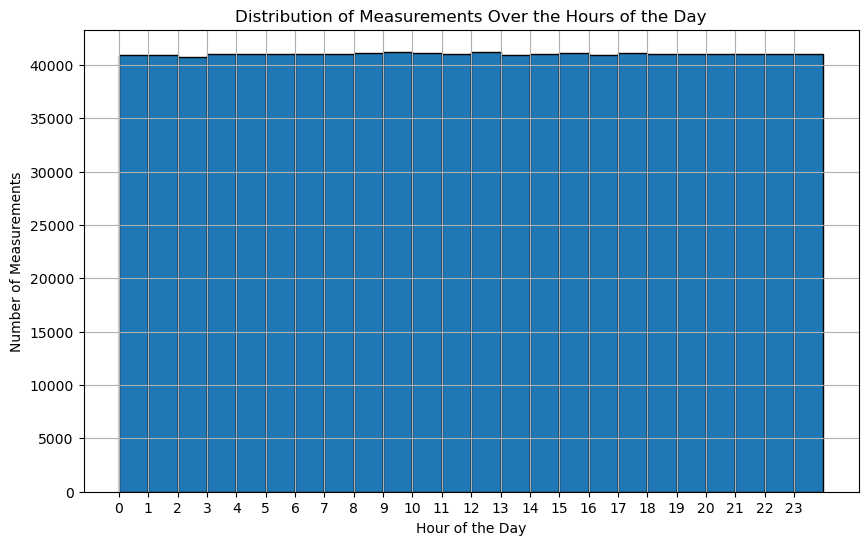

In [19]:
# Plot the distribution of measurements over the hours of the day
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black')
plt.title('Distribution of Measurements Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Measurements')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()
